In [7]:
import pandas as pd
df=pd.read_excel("C:/Users/year3/Downloads/Lab Session Data.xlsx",sheet_name='thyroid0387_UCI')
print(df.dtypes)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [14]:
#q5 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def explore_data(df):
    print("Data Shape:", df.shape)
    print("Data Columns:", df.columns)
    print("Data Types:", df.dtypes)

def identify_data_types(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    print("Numeric Columns:", numeric_cols)
    print("Categorical Columns:", categorical_cols)

    for col in categorical_cols:
        unique_values = df[col].unique()
        if len(unique_values) <= 2:
            print(f"Column: {col} (Binary/Nominal)")
        elif len(unique_values) > 2 and df[col].value_counts().index.is_monotonic_increasing:
            print(f"Column: {col} (Ordinal)")
        else:
            print(f"Column: {col} (Nominal)")

    for col in numeric_cols:
        if df[col].dtype == 'int64':
            print(f"Column: {col} (Interval/Ratio - Integer)")
        else:
            print(f"Column: {col} (Interval/Ratio - Continuous)")

def encode_categorical_variables(df, categorical_cols):
    for col in categorical_cols:
        unique_values = df[col].unique()
        if len(unique_values) <= 2:
            print(f"Column: {col} (Binary/Nominal) - One-Hot Encoding")
            df = pd.get_dummies(df, columns=[col], drop_first=True)
        elif len(unique_values) > 2 and df[col].value_counts().index.is_monotonic_increasing:
            print(f"Column: {col} (Ordinal) - Label Encoding")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        else:
            print(f"Column: {col} (Nominal) - One-Hot Encoding")
            df = pd.get_dummies(df, columns=[col], drop_first=True)
    return df

def study_numeric_variables(df, numeric_cols):
    for col in numeric_cols:
        print(f"Column: {col}")
        print(f"Min value: {df[col].min()}")
        print(f"Max value: {df[col].max()}")
        print(f"Range: {df[col].max() - df[col].min()}")
        print()

def check_missing_values(df):
    print("Missing Values:", df.isnull().sum())

def detect_outliers(df, numeric_cols):
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

   
    outliers = df[(df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))]
    print("Number of outliers in each numeric column:")
    print(outliers[numeric_cols].isnull().sum()) 

def calculate_summary_stats(df, numeric_cols):
    for col in numeric_cols:
        print(f"Column: {col}")
        print(f"Mean: {df[col].mean()}")
        print(f"Standard Deviation: {df[col].std()}")
        print()

def main(file_path):
    df = load_data(file_path)
    explore_data(df)

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    identify_data_types(df)
    df = encode_categorical_variables(df, categorical_cols)
    study_numeric_variables(df, numeric_cols)
    check_missing_values(df)
    detect_outliers(df, numeric_cols)
    calculate_summary_stats(df, numeric_cols)
    return df

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"  
    main(file_path)


Data Shape: (9172, 31)
Data Columns: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
Data Types: Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      

In [15]:
#q6
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def identify_numeric_outliers(df, numeric_cols):
    outliers_dict = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        if not outliers.empty:
            outliers_dict[col] = True
        else:
            outliers_dict[col] = False
    return outliers_dict

def impute_missing_values(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

   
    outliers_dict = identify_numeric_outliers(df, numeric_cols)
    
    
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:  
            if outliers_dict[col]:
                
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
                print(f"Imputed missing values in '{col}' with median value: {median_value}")
            else:
                
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
                print(f"Imputed missing values in '{col}' with mean value: {mean_value}")

    for col in categorical_cols:
        if df[col].isnull().sum() > 0:  
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Imputed missing values in '{col}' with mode value: {mode_value}")

    return df

def main(file_path):
    df = load_data(file_path)
    df = impute_missing_values(df)
    print("\nData after imputation:")
    print(df.head())
    return df

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"  
    df_imputed = main(file_path)



Data after imputation:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?  

In [16]:
#q7
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def identify_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    return numeric_cols

def normalize_data(df, numeric_cols):
    
    min_max_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()

    
    min_max_cols = [col for col in numeric_cols if df[col].min() >= 0 and df[col].max() <= 1]

   
    standardize_cols = [col for col in numeric_cols if col not in min_max_cols]

   
    if min_max_cols:
        print(f"Applying Min-Max Normalization to columns: {min_max_cols}")
        df[min_max_cols] = min_max_scaler.fit_transform(df[min_max_cols])

    
    if standardize_cols:
        print(f"Applying Standardization to columns: {standardize_cols}")
        df[standardize_cols] = standard_scaler.fit_transform(df[standardize_cols])

    return df

def main(file_path):
    df = load_data(file_path)
    
    
    numeric_cols = identify_numeric_columns(df)
    
   
    df_normalized = normalize_data(df, numeric_cols)
    
    print("\nData after normalization/scaling:")
    print(df_normalized.head())
    return df_normalized

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"  
    df_normalized = main(file_path)


Applying Standardization to columns: ['Record ID', 'age']

Data after normalization/scaling:
   Record ID       age sex on thyroxine query on thyroxine  \
0  -1.602090 -0.037634   F            f                  f   
1  -1.602090 -0.037634   F            f                  f   
2  -1.602086 -0.027499   F            f                  f   
3  -1.601822 -0.031722   F            f                  f   
4  -1.601822 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measur

In [17]:
#q8
import pandas as pd

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def preprocess_data(df):
   
    binary_cols = df.select_dtypes(include=['object']).columns
    for col in binary_cols:
        if df[col].nunique() == 2:  # If the column is binary
            df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
    return df

def compute_similarity_measures(df):
  
    vector1 = df.iloc[0]
    vector2 = df.iloc[1]

   
    binary_cols = df.columns[df.nunique() == 2]
    vector1_binary = vector1[binary_cols]
    vector2_binary = vector2[binary_cols]

   
    f11 = ((vector1_binary == 1) & (vector2_binary == 1)).sum()
    f10 = ((vector1_binary == 1) & (vector2_binary == 0)).sum()
    f01 = ((vector1_binary == 0) & (vector2_binary == 1)).sum()
    f00 = ((vector1_binary == 0) & (vector2_binary == 0)).sum()

   
    jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else 0

    
    smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else 0

    return jc, smc

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
    jc, smc = compute_similarity_measures(df)
    
    print(f"Jaccard Coefficient (JC): {jc}")
    print(f"Simple Matching Coefficient (SMC): {smc}")

    # Compare JC and SMC
    if jc > smc:
        print("Jaccard Coefficient (JC) is higher than Simple Matching Coefficient (SMC).")
    elif jc < smc:
        print("Simple Matching Coefficient (SMC) is higher than Jaccard Coefficient (JC).")
    else:
        print("Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) are equal.")

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"
    main(file_path)


Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.85
Simple Matching Coefficient (SMC) is higher than Jaccard Coefficient (JC).


In [18]:
#q9
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def preprocess_data(df):
    
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = pd.factorize(df[col])[0]
    return df

def compute_cosine_similarity(df):
  
    vector1 = df.iloc[0].values.reshape(1, -1)
    vector2 = df.iloc[1].values.reshape(1, -1)

   
    cos_sim = cosine_similarity(vector1, vector2)[0][0]
    
    return cos_sim

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
    cos_sim = compute_cosine_similarity(df)
    
    print(f"Cosine Similarity: {cos_sim:.4f}")

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"
    main(file_path)

    

Cosine Similarity: 1.0000


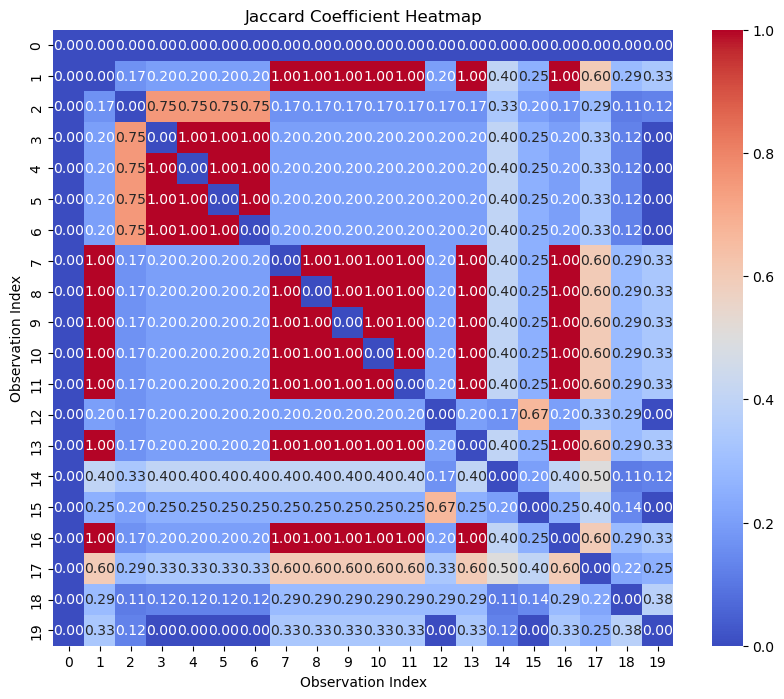

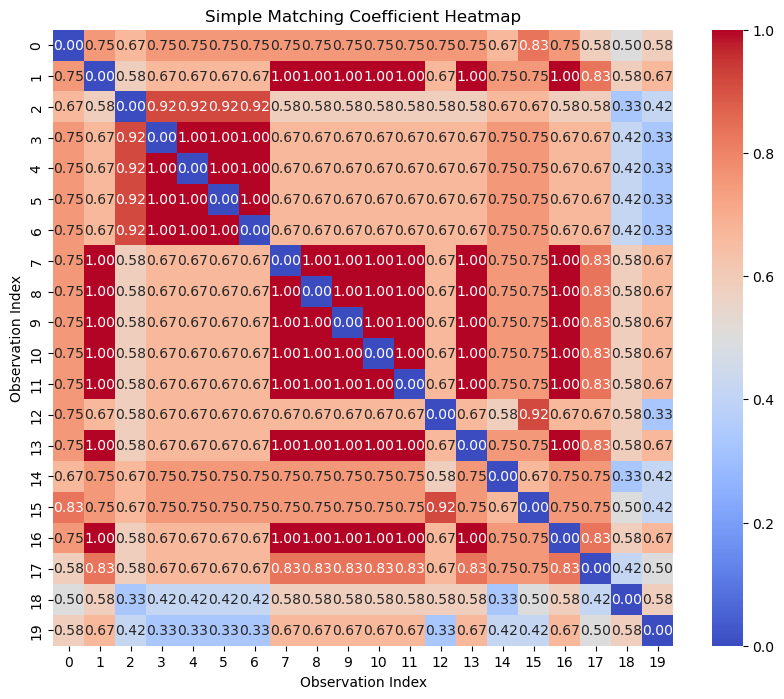

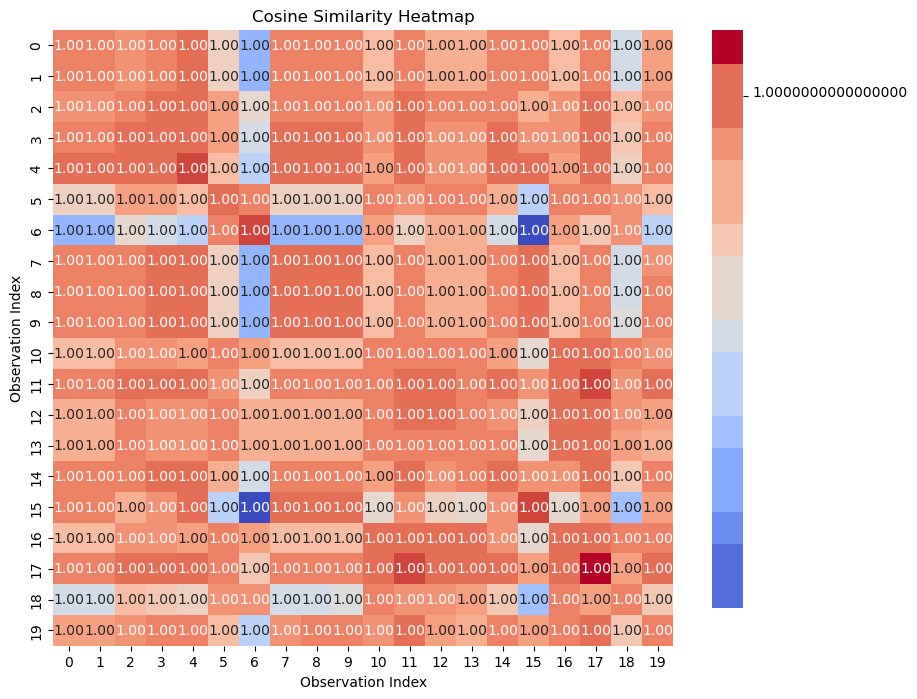

In [19]:
#q10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def preprocess_data(df):
    
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = pd.factorize(df[col])[0]
    return df

def compute_similarity_matrices(df):
    
    df_20 = df.head(20)
    
    
    binary_cols = df_20.columns[df_20.nunique() == 2]
    
    
    binary_df = df_20[binary_cols]
    num_vectors = binary_df.shape[0]
    
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
    
    for i in range(num_vectors):
        for j in range(num_vectors):
            if i != j:
                vector1 = binary_df.iloc[i]
                vector2 = binary_df.iloc[j]
                
                f11 = ((vector1 == 1) & (vector2 == 1)).sum()
                f10 = ((vector1 == 1) & (vector2 == 0)).sum()
                f01 = ((vector1 == 0) & (vector2 == 1)).sum()
                f00 = ((vector1 == 0) & (vector2 == 0)).sum()
                
                jc_matrix[i, j] = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else 0
                smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else 0

   
    vectors = df_20.values
    cos_sim_matrix = cosine_similarity(vectors)
    
    return jc_matrix, smc_matrix, cos_sim_matrix

def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel('Observation Index')
    plt.ylabel('Observation Index')
    plt.show()

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
    
    jc_matrix, smc_matrix, cos_sim_matrix = compute_similarity_matrices(df)
    
    plot_heatmap(jc_matrix, 'Jaccard Coefficient Heatmap')
    plot_heatmap(smc_matrix, 'Simple Matching Coefficient Heatmap')
    plot_heatmap(cos_sim_matrix, 'Cosine Similarity Heatmap')

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"
    main(file_path)
